In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

In [2]:
# binary trend model data
binary_stock = pd.read_csv(os.path.join("../", "Model Data", "binary_outcome_with_stock.csv"))
binary_stock = binary_stock.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Date'])
binary_stock.dropna(inplace=True)
binary_stock.sort_values(by='Search Date').head()


,Binary_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
751,Low,2020-01-24,52,78,42,22,75,16,72,38,...,-0.05,20875735.0,48.62,48.51,0.11,1990900.0,7.26,6.81,0.45,4195600.0
750,Low,2020-01-25,39,69,14,33,56,19,84,42,...,0.37,31150865.0,48.76,48.76,0.00,1698800.0,6.63,7.01,-0.38,4168300.0
749,Low,2020-01-26,38,69,41,23,55,16,61,39,...,-0.30,29443490.0,49.46,49.73,-0.27,2303000.0,6.90,6.97,-0.07,2158500.0
748,Low,2020-01-27,48,82,22,24,80,18,60,40,...,0.17,21047748.0,49.69,50.03,-0.34,2531000.0,6.89,6.84,0.05,1457600.0
747,Low,2020-01-28,44,86,41,22,86,17,63,44,...,0.29,21903596.0,49.89,49.40,0.49,1995500.0,6.76,6.31,0.45,2607200.0


In [3]:
x = binary_stock.drop(["Binary_Class", "Search Date", "DJIA_Open", "DJIA_Close", "DJIA_Difference", "DJIA_Volume"], axis=1)
#x.head()

y = binary_stock['Binary_Class']

In [11]:
#x.info(verbose=True)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [6]:
#scale the data
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)

In [7]:
#transform the training and testing data by using the x_scaler and y_sclaler models
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

k: 1, Train/Test Score: 1.00/0.81
k: 3, Train/Test Score: 0.87/0.78
k: 5, Train/Test Score: 0.86/0.81
k: 7, Train/Test Score: 0.85/0.82
k: 9, Train/Test Score: 0.85/0.82
k: 11, Train/Test Score: 0.86/0.84
k: 13, Train/Test Score: 0.85/0.83
k: 15, Train/Test Score: 0.84/0.83
k: 17, Train/Test Score: 0.84/0.84
k: 19, Train/Test Score: 0.85/0.84


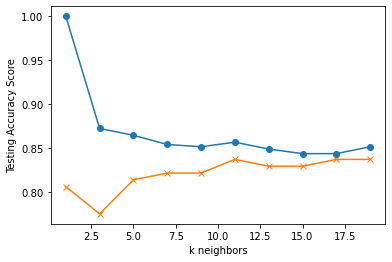

0.8515625
0.8372093023255814


In [8]:
# loop through different k values to find which has the highest accuracy
# only odd numbers
train_scores =[]
test_scores = []
for k in range (1, 20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.2f}/{test_score:.2f}")

plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker='x')
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()
print(train_score)
print(test_score)

In [9]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train_scaled, y_train)
print('k=11 Test Acc: %.3f' %knn.score(x_test_scaled, y_test))

k=11 Test Acc: 0.899
